In [23]:
#author: wk, last modified: 20.02.2020

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl

In [2]:
from glob import glob

files = sorted(glob('/Users/Fairy/Desktop/General_Circulation/ERA5_data/ERA5_1x1/*.nc'))
files

['/Users/Fairy/Desktop/General_Circulation/ERA5_data/ERA5_1x1/ERA5_single_levels_1x1.nc']

In [3]:
ds = xr.open_dataset(files[0])
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 492)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    t2m_0001   (time, lat, lon) float32 ...
    msl_0001   (time, lat, lon) float32 ...
    slhf_0001  (time, lat, lon) float32 ...
    ssr_0001   (time, lat, lon) float32 ...
    str_0001   (time, lat, lon) float32 ...
    sp_0001    (time, lat, lon) float32 ...
    ssrd_0001  (time, lat, lon) float32 ...
    strd_0001  (time, lat, lon) float32 ...
    tisr_0001  (time, lat, lon) float32 ...
    tsr_0001   (time, lat, lon) float32 ...
    ttr_0001   (time, lat, lon) float32 ...
    tp_0001    (time, lat, lon) float32 ...
    t2m_0005   (time, lat, lon) float32 ...
    msl_0005   (time, lat, lon) float32 ...
    slhf_0005  (time, lat, lon) float32 ...
    ssr_0005   (tim

In [7]:
ds.t2m_0001 

<xarray.DataArray 't2m_0001' (time: 492, lat: 180, lon: 360)>
[31881600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:  2 metre temperature
    units:      K

In [8]:
ds.t2m_0005

<xarray.DataArray 't2m_0005' (time: 492, lat: 180, lon: 360)>
[31881600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:  2 metre temperature
    units:      K

In [10]:
ds.t2m_0001[0]

<xarray.DataArray 't2m_0001' (lat: 180, lon: 360)>
array([[243.49759, 243.50111, 243.50288, ..., 243.49054, 243.4923 , 243.49582],
       [243.95955, 243.94016, 243.91899, ..., 244.03183, 244.00891, 243.98247],
       [244.77061, 244.73535, 244.70186, ..., 244.84644, 244.82704, 244.80765],
       ...,
       [246.458  , 246.37865, 246.29932, ..., 246.58319, 246.54086, 246.49855],
       [245.65222, 245.60637, 245.55876, ..., 245.77916, 245.73685, 245.69629],
       [245.38068, 245.36835, 245.356  , ..., 245.39479, 245.39127, 245.38774]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1979-01-01
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:  2 metre temperature
    units:      K

In [101]:
print(np.isnan(ds.t2m_0005[0]).sum())
print(180*360)

<xarray.DataArray 't2m_0005' ()>
array(64800)
Coordinates:
    time     datetime64[ns] 1979-01-01
64800


In [14]:
#figure 3.2 Sea-level-pressure maps contour plot & average with respect to longitude

ds.msl_0001

<xarray.DataArray 'msl_0001' (time: 492, lat: 180, lon: 360)>
[31881600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          Pa

In [17]:
msl_monthly_mean = ds.msl_0001.groupby('time.month').mean('time')
msl_monthly_mean

<xarray.DataArray 'msl_0001' (month: 12, lat: 180, lon: 360)>
array([[[100526.01 , 100525.9  , ..., 100525.88 , 100525.85 ],
        [100503.03 , 100505.92 , ..., 100498.52 , 100500.766],
        ...,
        [101355.29 , 101354.97 , ..., 101355.66 , 101355.47 ],
        [101427.98 , 101427.91 , ..., 101428.35 , 101428.12 ]],

       [[100753.25 , 100752.42 , ..., 100754.055, 100753.47 ],
        [100736.63 , 100740.4  , ..., 100731.61 , 100734.11 ],
        ...,
        [101408.58 , 101408.195, ..., 101409.03 , 101408.78 ],
        [101471.04 , 101470.98 , ..., 101471.375, 101471.18 ]],

       ...,

       [[100471.95 , 100471.85 , ..., 100471.43 , 100471.57 ],
        [100465.266, 100469.25 , ..., 100459.016, 100462.14 ],
        ...,
        [101429.   , 101428.3  , ..., 101430.06 , 101429.5  ],
        [101472.99 , 101472.86 , ..., 101473.55 , 101473.27 ]],

       [[100364.914, 100364.94 , ..., 100364.58 , 100364.65 ],
        [100337.5  , 100340.234, ..., 100333.04 , 100335.27 ]

In [23]:
mslp = msl_monthly_mean[0] * (10**-2)
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
mslp.plot(cmap=plt.cm.coolwarm)
plt.title('MSLP January Mean (1979-2019)')

Text(0.5, 1.0, 'MSLP January Mean (1979-2019)')

Text(0.5, 1.0, 'MSLP January Mean (1979-2019)')

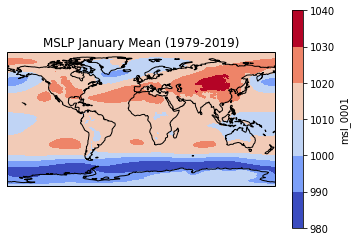

In [26]:
mslp = msl_monthly_mean[0] * (10**-2)
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
mslp.plot.contourf(cmap=plt.cm.coolwarm)
plt.title('MSLP January Mean (1979-2019)')

<a list of 3 text.Text objects>

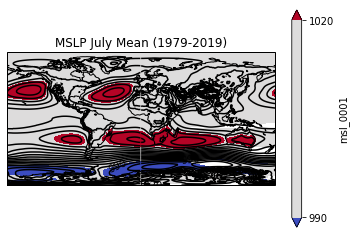

In [54]:
mslp = msl_monthly_mean[6] * (10**-2)
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cs = mslp.plot.contourf(cmap=plt.cm.coolwarm, levels=[990, 1020])#, levels=[970, 980, 990, 1000, 1010, 1020, 1030])
plt.title('MSLP July Mean (1979-2019)')
ax.contour(cs, colors='k', levels=[ 970,  973,  976,  979,  982,  985,  988,  991,  994,  997, 1000,
       1003, 1006, 1009, 1012, 1015, 1018, 1021, 1024, 1027, 1030, 1033,
       1036, 1039])
plt.clabel(cs, colors='k', fmt='%1.0f')

In [37]:
np.arange(970, 1040, 10)

array([ 970,  980,  990, 1000, 1010, 1020, 1030])

In [40]:
np.arange(970, 1040, 3)

array([ 970,  973,  976,  979,  982,  985,  988,  991,  994,  997, 1000,
       1003, 1006, 1009, 1012, 1015, 1018, 1021, 1024, 1027, 1030, 1033,
       1036, 1039])

<a list of 17 text.Text objects>

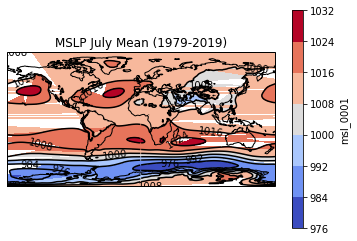

In [53]:
mslp = msl_monthly_mean[6] * (10**-2)
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cs = mslp.plot.contourf(cmap=plt.cm.coolwarm)#, levels=[990, 1020])#, levels=[970, 980, 990, 1000, 1010, 1020, 1030])
plt.title('MSLP July Mean (1979-2019)')
ax.contour(cs, colors='k')
plt.clabel(cs, colors='k', fmt='%1.0f')

In [67]:
#average with respect to longitude
x_lat = ds.lat.values #for plotting later
#make integrall of Net_flux_TOA_calc
mslp_lon_mean = np.zeros(180)
for i in range(0,180):
    mslp_lon_mean[i] = msl_monthly_mean[6][i,:].mean()
mslp_lon_mean*10**-2

plt.plot(mslp_lon_mean*10**-2, x_lat)
plt.xlim([980, 1030])

(980, 1030)

In [61]:
msl_monthly_mean[6][0,:]

<xarray.DataArray 'msl_0001' (lon: 360)>
array([101212.42 , 101210.414, 101207.5  , ..., 101216.195, 101214.734,
       101213.266], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    lat      float32 -89.5
    month    int64 7

AttributeError: 'AxesSubplot' object has no attribute 'plt'

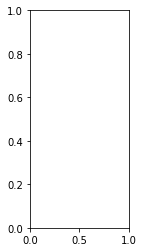

In [78]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
#axes[0].plot(x1, y1)
ax = plt.subplot(131)

mslp = msl_monthly_mean[6] * (10**-2)
#axes[0]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cs = mslp.plot.contourf(cmap=plt.cm.coolwarm)#, levels=[990, 1020])#, levels=[970, 980, 990, 1000, 1010, 1020, 1030])
plt.title('MSLP July Mean (1979-2019)')
ax.contour(cs, colors='k')
plt.clabel(cs, colors='k', fmt='%1.0f')
#axes[0].contourf(mslp, cmap=plt.cm.coolwarm)#, levels=[990, 1020])

ax2 = plt.subplot(132)
ax2.plot(mslp_lon_mean*10**-2, x_lat)
#axes[1].xlim([980, 1030])
fig.tight_layout()

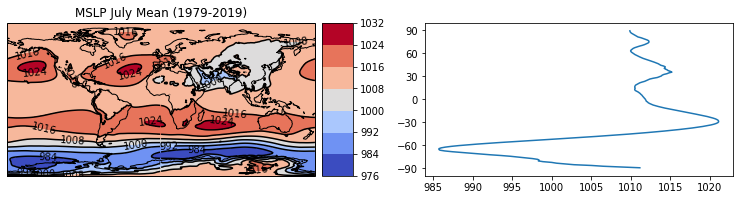

In [96]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

mslp = msl_monthly_mean[6] * (10**-2)
mslp_lon_mean = np.zeros(180)
for i in range(0,180):
    mslp_lon_mean[i] = msl_monthly_mean[6][i,:].mean()


fig = plt.figure(figsize=(13, 8))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
img = mslp.plot.contourf(cmap=plt.cm.coolwarm, add_colorbar=False)
cs = ax1.contour(cs, colors='k')
ax1.clabel(cs, colors='k', fmt='%1.0f')
ax1.coastlines()
ax1.set_title('MSLP July Mean (1979-2019)')

divider = make_axes_locatable(ax1)
ax2 = divider.new_horizontal(size="10%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax2)
plt.colorbar(img, cax=ax2)

ax3 = divider.new_horizontal(size="100%", pad=1, axes_class=plt.Axes)
fig.add_axes(ax3)
#ax3.plot([1, 2, 3], [5, 6, 7])
ax3.plot(mslp_lon_mean*10**-2, x_lat)
ax3.set_ylim([-100,100])
ax3.set_yticks([-90, -60, -30,   0,  30,  60,  90])

In [93]:
np.arange(-90, 100, 30)

array([-90, -60, -30,   0,  30,  60,  90])

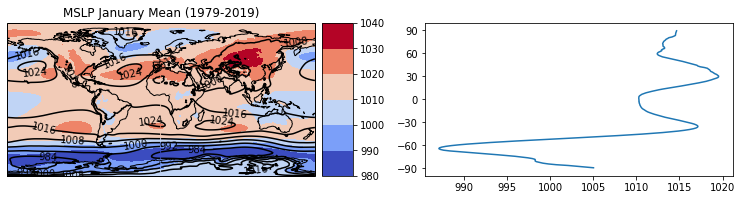

In [97]:
mslp = msl_monthly_mean[0] * (10**-2)
mslp_lon_mean = np.zeros(180)
for i in range(0,180):
    mslp_lon_mean[i] = msl_monthly_mean[0][i,:].mean()

fig = plt.figure(figsize=(13, 8))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
img = mslp.plot.contourf(cmap=plt.cm.coolwarm, add_colorbar=False)
cs = ax1.contour(cs, colors='k')
ax1.clabel(cs, colors='k', fmt='%1.0f')
ax1.coastlines()
ax1.set_title('MSLP January Mean (1979-2019)')

divider = make_axes_locatable(ax1)
ax2 = divider.new_horizontal(size="10%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax2)
plt.colorbar(img, cax=ax2)

ax3 = divider.new_horizontal(size="100%", pad=1, axes_class=plt.Axes)
fig.add_axes(ax3)
#ax3.plot([1, 2, 3], [5, 6, 7])
ax3.plot(mslp_lon_mean*10**-2, x_lat)
ax3.set_ylim([-100,100])
ax3.set_yticks([-90, -60, -30,   0,  30,  60,  90])

Text(0.5, 1.0, 'MSLP January departure of the zonal mean (1979-2019)')

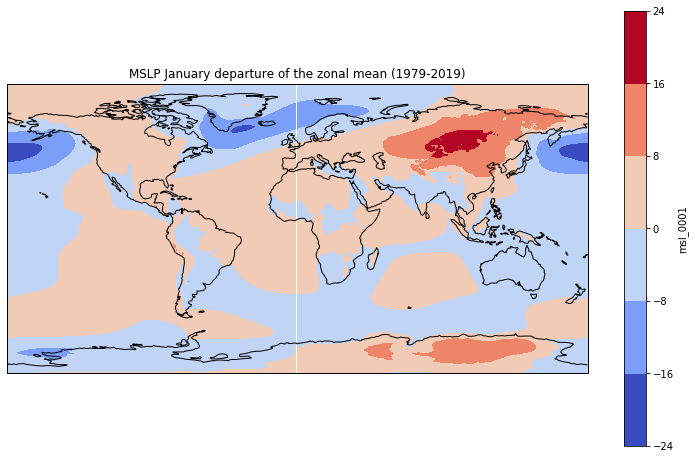

In [146]:
#departure from the zonal mean - Temperature!!! instead

mslp = msl_monthly_mean[0] * (10**-2)
mslp_zonal_mean = np.zeros([180,360])
for i in range(0,180):
    mslp_zonal_mean[i,:] = msl_monthly_mean[0][i,:].mean()* (10**-2)
    
departure_mslp = mslp - mslp_zonal_mean

#data, lon = add_cyclic_point(data, coord=lon)

fig = plt.figure(figsize=(13, 8))
#ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax1 = plt.axes(projection=ccrs.PlateCarree())
img = departure_mslp.plot.contourf(cmap=plt.cm.coolwarm)
cs = ax1.contour(cs, colors='k')
ax1.clabel(cs, colors='k', fmt='%1.0f')
ax1.coastlines()
ax1.set_title('MSLP January departure of the zonal mean (1979-2019)')


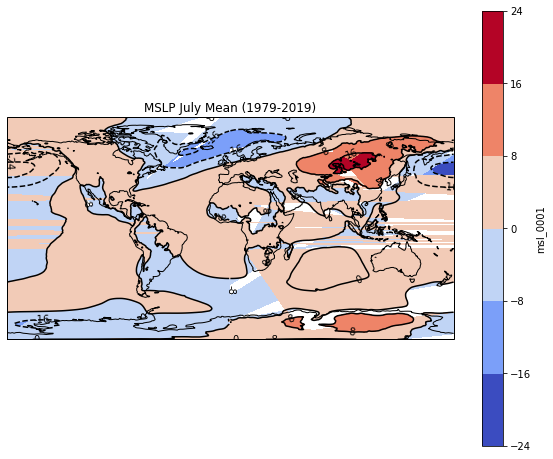

In [141]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cs = departure_mslp.plot.contourf(cmap=plt.cm.coolwarm)#, levels=[990, 1020])#, levels=[970, 980, 990, 1000, 1010, 1020, 1030])
plt.title('MSLP July Mean (1979-2019)')
ax.contour(cs, colors='k')
plt.clabel(cs, colors='k', fmt='%1.0f')
fig.tight_layout()

Text(0.5, 1.0, 'MSLP July Mean (1979-2019)')

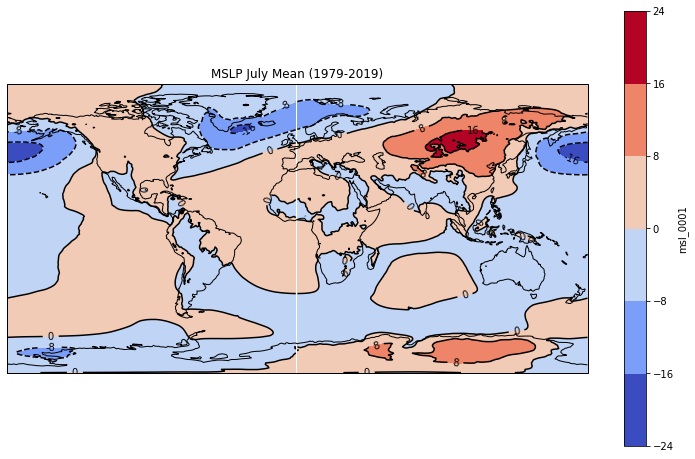

In [138]:
fig = plt.figure(figsize=(13, 8))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
img = departure_mslp.plot.contourf(cmap=plt.cm.coolwarm)
cs = ax1.contour(cs, colors='k')
ax1.clabel(cs, colors='k', fmt='%1.0f')
ax1.coastlines()
ax1.set_title('MSLP July Mean (1979-2019)')


In [10]:
#departure from the zonal mean - Temperature!!! instead

t2m_monthly_mean = ds.t2m_0001.groupby('time.month').mean('time')
t2m_monthly_mean = t2m_monthly_mean -273.15
#t2m = t2m_monthly_mean[0]
#mslp = msl_monthly_mean[0] * (10**-2)
t2m_zonal_mean = np.zeros([180,360])
for i in range(0,180):
    t2m_zonal_mean[i,:] = t2m_monthly_mean[0][i,:].mean()
    
departure_t2m = t2m_monthly_mean[0] - t2m_zonal_mean

#data, lon = add_cyclic_point(data, coord=lon)

fig = plt.figure(figsize=(13, 8))
#ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax1 = plt.axes(projection=ccrs.PlateCarree())
cs = departure_t2m.plot.contourf(cmap=plt.cm.coolwarm)
cs = ax1.contour(cs, colors='k')
ax1.clabel(cs, colors='k', fmt='%1.0f')
ax1.coastlines()
ax1.set_title('T2m January departure of the zonal mean (1979-2019)')

Text(0.5, 1.0, 'MSLP January departure of the zonal mean (1979-2019)')

In [42]:
#departure from the zonal mean - Temperature!!! instead

t2m_monthly_mean = ds.t2m_0001.groupby('time.month').mean('time')
t2m_monthly_mean = t2m_monthly_mean -273.15
#t2m = t2m_monthly_mean[0]
#mslp = msl_monthly_mean[0] * (10**-2)
t2m_zonal_mean = np.zeros([180,360])
for i in range(0,180):
    t2m_zonal_mean[i,:] = t2m_monthly_mean[6][i,:].mean()
    
departure_t2m = t2m_monthly_mean[6] - t2m_zonal_mean

#data, lon = add_cyclic_point(data, coord=lon)

fig = plt.figure(figsize=(13, 8))
#ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax1 = plt.axes(projection=ccrs.PlateCarree())
cs = departure_t2m.plot.contourf(cmap=plt.cm.coolwarm, add_colorbar=False, vmin=-14, vmax=14)
#cs.set_clim([-14, 14])
cbar = fig.colorbar(cs, ticks=[-14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14])
#cbar.clim([-14,14])
#cs.set_clim(-14, 14)
cs = ax1.contour(cs, colors='k')
ax1.clabel(cs, colors='k', fmt='%1.0f')
ax1.coastlines()
ax1.set_title('T2m July departure of the zonal mean (1979-2019)')

Text(0.5, 1.0, 'T2m July departure of the zonal mean (1979-2019)')